Installing necessary packages:

```Julia
using Pkg

Pkg.add(["DataFrames", "Statistics", "CSV", "Plots", "StatsPlots"])
```

In [1]:
using DataFrames, Statistics, CSV, Plots, StatsPlots

In [2]:
df = CSV.read(pwd() * "/data_raw/init_res.csv", DataFrame)

describe(df)

6×7 DataFrame
 Row │ variable       mean     min      median   max      nmissing  eltype   
     │ Symbol         Float64  Float64  Float64  Float64  Int64     DataType 
─────┼───────────────────────────────────────────────────────────────────────
   1 │ actual         10387.4  9604.0   10385.0  11182.0         0  Float64
   2 │ expected       10386.9  9692.25  10387.9  11074.7         0  Float64
   3 │ glm_est        10125.0  8083.57  10102.9  12805.5         0  Float64
   4 │ ols_est        10042.6  7624.68  10024.2  13424.9         0  Float64
   5 │ mle_glm_start  10089.9  7816.64  10075.2  13147.0         0  Float64
   6 │ mle_lm_start   10089.9  7816.64  10075.2  13147.0         0  Float64

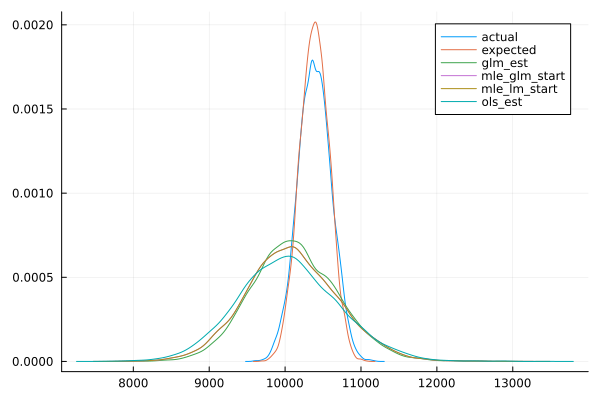

In [3]:
df_plot = stack(df, 1:6)

density(df_plot[:, :value], group = df_plot[:, :variable])

┌ Warning: Keyword argument bar_position not supported with Plots.GRBackend().  Choose from: annotationcolor, annotationfontfamily, annotationfontsize, annotationhalign, annotationrotation, annotations, annotationvalign, arrow, aspect_ratio, axis, background_color, background_color_inside, background_color_outside, background_color_subplot, bar_width, bins, bottom_margin, camera, clims, color_palette, colorbar, colorbar_entry, colorbar_scale, colorbar_title, colorbar_titlefont, colorbar_titlefontcolor, colorbar_titlefontrotation, colorbar_titlefontsize, connections, contour_labels, discrete_values, fill, fill_z, fillalpha, fillcolor, fillrange, fillstyle, flip, fontfamily, fontfamily_subplot, foreground_color, foreground_color_axis, foreground_color_border, foreground_color_grid, foreground_color_subplot, foreground_color_text, formatter, framestyle, grid, gridalpha, gridlinewidth, gridstyle, group, guide, guidefont, guidefontcolor, guidefontfamily, guidefonthalign, guidefontrotation, 

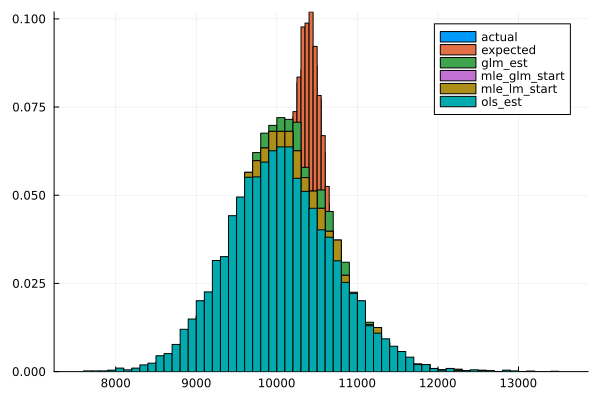

In [4]:
histogram(df_plot[:, :value], group = df_plot[:, :variable], bar_position = :stack; normalize=:probability)

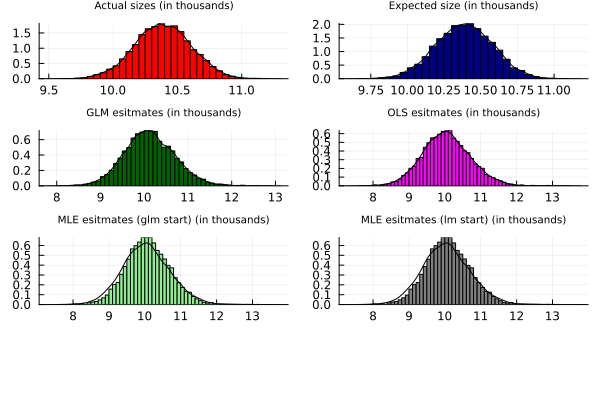

In [5]:
p1 = histogram(df[:, 1] / 1000, normalize = true, legend = false, colour = :red, title = "Actual sizes (in thousands)", titlefontsize = 7)
density!(df[:, 1] / 1000, legend = false, colour = :black)

p2 = histogram(df[:, 2] / 1000, normalize = true, legend = false, title = "Expected size (in thousands)", colour = :navy, titlefontsize = 7)
density!(df[:, 2] / 1000, legend = false, colour = :black)

p3 = histogram(df[:, 3] / 1000, normalize = true, legend = false, title = "GLM esitmates (in thousands)", colour = :darkgreen, titlefontsize = 7)
density!(df[:, 3] / 1000, legend = false, colour = :black)

p4 = histogram(df[:, 4] / 1000, normalize = true, legend = false, title = "OLS esitmates (in thousands)", colour = :magenta, titlefontsize = 7)
density!(df[:, 4] / 1000, legend = false, colour = :black)

p5 = histogram(df[:, 5] / 1000, normalize = true, legend = false, title = "MLE esitmates (glm start) (in thousands)", colour = :lightgreen, titlefontsize = 7)
density!(df[:, 4] / 1000, legend = false, colour = :black)

p6 = histogram(df[:, 6] / 1000, normalize = true, legend = false, title = "MLE esitmates (lm start) (in thousands)", colour = :gray, titlefontsize = 7)
density!(df[:, 4] / 1000, legend = false, colour = :black)

plot(
    layout = [3, 3],
    p1, p2, p3, p4, p5, p6
)

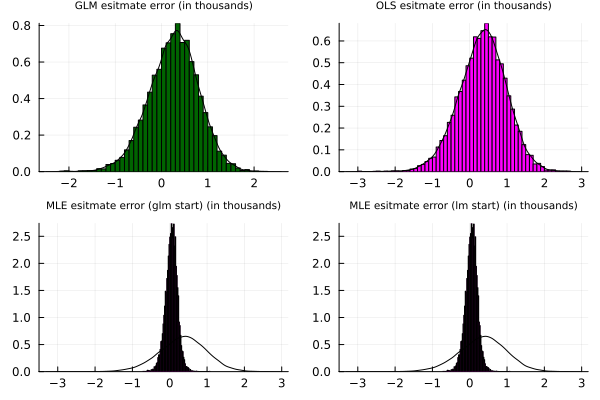

In [6]:
p1 = histogram((df[:, 2] - df[:, 3]) / 1000, normalize = true, legend = false, title = "GLM esitmate error (in thousands)", colour = :darkgreen, titlefontsize = 7)
density!((df[:, 2] - df[:, 3]) / 1000, legend = false, colour = :black)

p2 = histogram((df[:, 2] - df[:, 4]) / 1000, normalize = true, legend = false, title = "OLS esitmate error (in thousands)", colour = :magenta, titlefontsize = 7)
density!((df[:, 2] - df[:, 4]) / 1000, legend = false, colour = :black)

p3 = histogram((df[:, 5] - df[:, 4]) / 1000, normalize = true, legend = false, title = "MLE esitmate error (glm start) (in thousands)", colour = :magenta, titlefontsize = 7)
density!((df[:, 2] - df[:, 4]) / 1000, legend = false, colour = :black)

p4 = histogram((df[:, 6] - df[:, 4]) / 1000, normalize = true, legend = false, title = "MLE esitmate error (lm start) (in thousands)", colour = :magenta, titlefontsize = 7)
density!((df[:, 2] - df[:, 4]) / 1000, legend = false, colour = :black)

plot(
    p1, p2, p3, p4, layout = [2, 2]
)

### Higher population counts

In [7]:
df = CSV.read(pwd() * "/data_raw/init_res_1.csv", DataFrame)

describe(df)

6×7 DataFrame
 Row │ variable       mean            min            median          max       ⋯
     │ Symbol         Float64         Float64        Float64         Float64   ⋯
─────┼──────────────────────────────────────────────────────────────────────────
   1 │ actual              6.03546e5  555090.0       603597.0        655810.0  ⋯
   2 │ expected            6.03546e5  554276.0            6.03595e5       6.55
   3 │ glm_est             5.39599e5       1.5562e5       5.20156e5       2.65
   4 │ ols_est             5.40289e5       1.5534e5       5.19848e5       2.79
   5 │ mle_glm_start  540266.0        156088.0            5.1964e5        2.76 ⋯
   6 │ mle_lm_start   540266.0        156088.0            5.1964e5        2.76
                                                               3 columns omitted

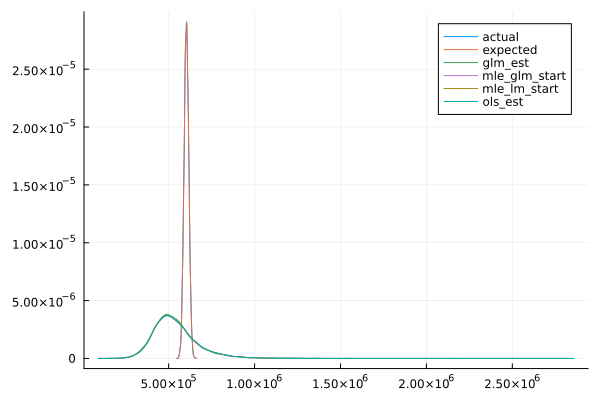

In [8]:
df_plot = stack(df, 1:6)

density(df_plot[:, :value], group = df_plot[:, :variable])

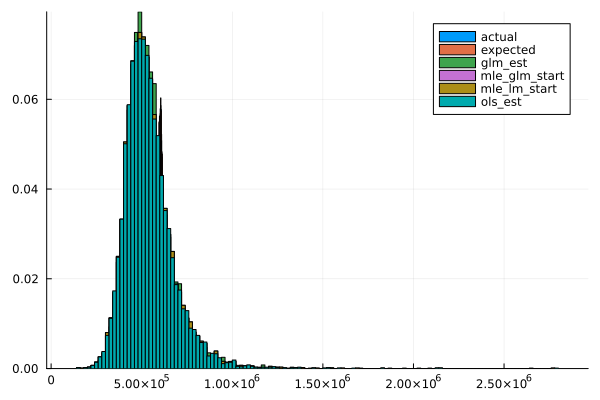

In [9]:
histogram(df_plot[:, :value], group = df_plot[:, :variable], bar_position = :stack; normalize=:probability)

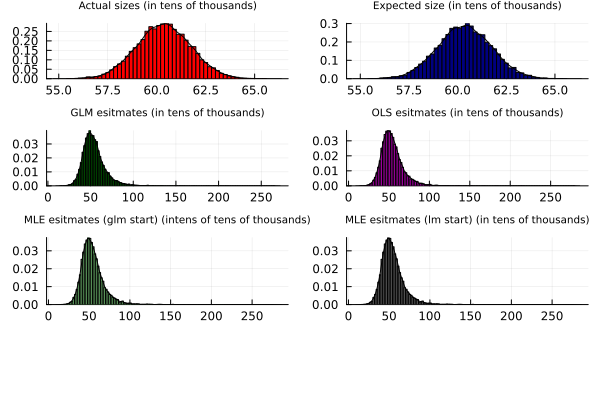

In [10]:
p1 = histogram(df[:, 1] / 10000, normalize = true, legend = false, colour = :red, title = "Actual sizes (in tens of thousands)", titlefontsize = 7)
density!(df[:, 1] / 10000, legend = false, colour = :black)

p2 = histogram(df[:, 2] / 10000, normalize = true, legend = false, title = "Expected size (in tens of thousands)", colour = :navy, titlefontsize = 7)
density!(df[:, 2] / 10000, legend = false, colour = :black)

p3 = histogram(df[:, 3] / 10000, normalize = true, legend = false, title = "GLM esitmates (in tens of thousands)", colour = :darkgreen, titlefontsize = 7)
density!(df[:, 3] / 10000, legend = false, colour = :black)

p4 = histogram(df[:, 4] / 10000, normalize = true, legend = false, title = "OLS esitmates (in tens of thousands)", colour = :magenta, titlefontsize = 7)
density!(df[:, 4] / 10000, legend = false, colour = :black)

p5 = histogram(df[:, 5] / 10000, normalize = true, legend = false, title = "MLE esitmates (glm start) (intens of tens of thousands)", colour = :lightgreen, titlefontsize = 7)
density!(df[:, 4] / 10000, legend = false, colour = :black)

p6 = histogram(df[:, 6] / 10000, normalize = true, legend = false, title = "MLE esitmates (lm start) (in tens of thousands)", colour = :gray, titlefontsize = 7)
density!(df[:, 4] / 10000, legend = false, colour = :black)

plot(
    layout = [3, 3],
    p1, p2, p3, p4, p5, p6
)

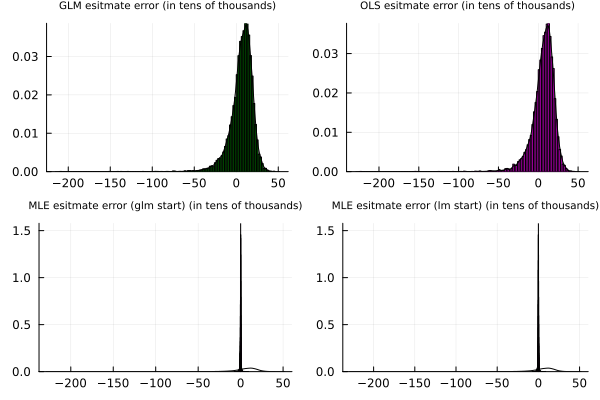

In [11]:
p1 = histogram((df[:, 2] - df[:, 3]) / 10000, normalize = true, legend = false, title = "GLM esitmate error (in tens of thousands)", colour = :darkgreen, titlefontsize = 7)
density!((df[:, 2] - df[:, 3]) / 10000, legend = false, colour = :black)

p2 = histogram((df[:, 2] - df[:, 4]) / 10000, normalize = true, legend = false, title = "OLS esitmate error (in tens of thousands)", colour = :magenta, titlefontsize = 7)
density!((df[:, 2] - df[:, 4]) / 10000, legend = false, colour = :black)

p3 = histogram((df[:, 5] - df[:, 4]) / 10000, normalize = true, legend = false, title = "MLE esitmate error (glm start) (in tens of thousands)", colour = :magenta, titlefontsize = 7)
density!((df[:, 2] - df[:, 4]) / 10000, legend = false, colour = :black)

p4 = histogram((df[:, 6] - df[:, 4]) / 10000, normalize = true, legend = false, title = "MLE esitmate error (lm start) (in tens of thousands)", colour = :magenta, titlefontsize = 7)
density!((df[:, 2] - df[:, 4]) / 10000, legend = false, colour = :black)

plot(
    p1, p2, p3, p4, layout = [2, 2]
)